In [1]:
# Import Packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


In [2]:
# Notation: 
# x_k1 = x_{k+1}, x_k = x_{k}, s_k = s_{k},

#-----------------------------------------------------------------------------#      
#               Gradientenverfahren mit Armijo-Schrittweiten
#-----------------------------------------------------------------------------#
def grad_armijo_min(x0, beta, gamma, tol,f, grad_f):
    
    counter = 0;
    x_k = x0; 
    while np.linalg.norm(grad_f(x_k)) > tol:
    
        s_k = - grad_f(x_k); 
    
        # Bestimmung von Armijo-Schrittweite sigma_k
        l = 0;   
        sigma_k = beta**l;   
        while f(x_k + sigma_k*s_k) - f(x_k) > (beta**l)*gamma*np.dot(grad_f(x_k),s_k):
            sigma_k = beta**(l+1);
            l = l+1;
            
        x_k= x_k + sigma_k*s_k; 
        counter = counter + 1; 
    
    return x_k,counter; 
#-----------------------------------------------------------------------------#



#-----------------------------------------------------------------------------#      
#               Gradientenverfahren mit Armijo-Schrittweiten
#                       (Modifizierte Funktion)
#-----------------------------------------------------------------------------#
def grad_armijo_min_(x0, beta, gamma, tol,f, grad_f):
    
    error = [];
    iterierte_x1 = [];
    iterierte_x2 = [];

    iterierte_x1.append(x0[0]);
    iterierte_x2.append(x0[1]);
    x_min = np.array([2,-1]);
    error.append(np.linalg.norm(x0 - x_min)); 
    
    counter = 0;
    x_k = x0; 
    while np.linalg.norm(grad_f(x_k)) > tol:
    
        s_k = - grad_f(x_k); 
    
        # Bestimmung von Armijo-Schrittweite sigma_k
        l = 0;   
        sigma_k = beta**l;   
        while f(x_k + sigma_k*s_k) - f(x_k) > (beta**l)*gamma*np.dot(grad_f(x_k),s_k):
            sigma_k = beta**(l+1);
            l = l+1;
            
        x_k= x_k + sigma_k*s_k; 
        counter = counter + 1;
        
        # Speicherung des Fehlers/Iterierte
        error.append(np.linalg.norm(x_k - x_min));
        iterierte_x1.append(x_k[0]);
        iterierte_x2.append(x_k[1]);
        counter = counter + 1;
    
    return x_k,counter,error,iterierte_x1,iterierte_x2; 
#-----------------------------------------------------------------------------#   



In [3]:
#-----------------------------------------------------------------------------#      
#                            Zielfunktion
#-----------------------------------------------------------------------------#
def f(x): 
   y = (x[0]-2)**4 + (x[1]**2)*(x[0]-2)**2 + (x[1]+1)**2
   return y; 
#-----------------------------------------------------------------------------#


#-----------------------------------------------------------------------------#      
#                       Gradient der Zielfunktion
#-----------------------------------------------------------------------------#
def grad_f(x):  
    gradient = np.array([ 4*((x[0]-2)**3) + 2*(x[0]-2)*(x[1]**2), 2*x[1]*((x[0]-2)**2) + 2*(x[1]+1) ]); 
    return gradient;  
#-----------------------------------------------------------------------------#

In [4]:
#=============================================================================#
# Aufgabe 3a)
# Setzen des Startvektors, Toleranz, beta, gamma
x0 = np.array([1,1]); 
tol = 1e-6;
beta = 1/2;
gamma = 1/2; 

# Ausführen der Funktion
solution,iterationen = grad_armijo_min(x0, beta, gamma, tol,f, grad_f); 
print("------Gradienten-Verfahren mit Armijo-Schrittweitenregel ------")
print("Lösung:", "[x1,x2] =","[",solution[0],",",solution[1],"]");
print("Anzahl Iterationen:", iterationen);


 

------Gradienten-Verfahren mit Armijo-Schrittweitenregel ------
Lösung: [x1,x2] = [ 1.999999995396063 , -0.9999999883964977 ]
Anzahl Iterationen: 7


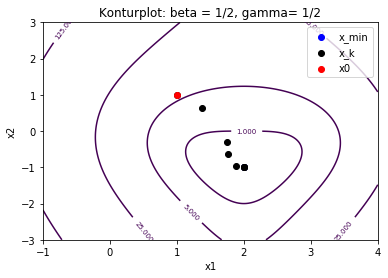

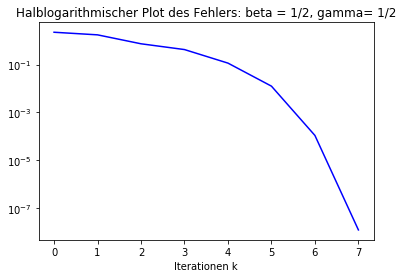

In [5]:

# Setzen des Startvektors, Toleranz, beta, gamma
x0 = np.array([1,1]); 
tol = 1e-6;
beta = 1/2;
gamma = 1/2; 
x_min = np.array([2,-1]); 

# Ausführen modifizierten Funktion
x_k,counter,error,iterierte_x1,iterierte_x2 = grad_armijo_min_(x0, beta, gamma, tol,f, grad_f); 

# Konturplot
fig, ax = plt.subplots(); 
x1_vals = np.linspace(-1, 4, 1000)
x2_vals = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(x1_vals, x2_vals)
Z = (X-2)**4 + (Y**2)*(X-2)**2 + (Y+1)**2
CS = ax.contour(X, Y, Z, [5**k for k in range(20)]); 
ax.scatter(x_min[0],x_min[1], color='blue', label = "x_min"); 
ax.scatter(iterierte_x1,iterierte_x2, color='black', label = "x_k"); 
ax.scatter(x0[0],x0[1], color='red', label = "x0"); 
ax.clabel(CS, inline=True, fontsize=7); 
plt.legend(loc="upper right");
plt.title('Konturplot: beta = 1/2, gamma= 1/2');
plt.xlabel('x1')
plt.ylabel('x2')
plt.show(); 


# Plot des Fehlers (halblogarithmisch)
plt.semilogy(range(0,len(error)), error,  "-b");
plt.xlabel('Iterationen k');
plt.title("Halblogarithmischer Plot des Fehlers: beta = 1/2, gamma= 1/2") 
plt.show();